# Clustering Exercises

In [1]:
# imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from env import get_db_url
import prepare as p
import acquire as a


## Acquire and Summarize



### 1. Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [2]:
df = a.get_zillow()

/Users/click/codeup-data-science/clustering-exercises/acquire.py:21: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [3]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,propertylandusetypeid,id,basementsqft,...,propertylandusedesc,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,NaN,NaN,NaN,NaN,261.0,1727539,NaN,...,Single Family Residential,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,17052889,NaN,NaN,NaN,NaN,NaN,NaN,261.0,1387261,NaN,...,Single Family Residential,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2,14186244,NaN,NaN,NaN,NaN,NaN,NaN,261.0,11677,NaN,...,Single Family Residential,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
3,12177905,NaN,NaN,2.0,NaN,NaN,NaN,261.0,2288172,NaN,...,Single Family Residential,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,NaN,NaN
4,10887214,NaN,NaN,2.0,NaN,NaN,1.0,266.0,1970746,NaN,...,Condominium,4,0.006940,2017-01-01,Central,NaN,NaN,Central,NaN,NaN


### 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)


In [4]:
df.shape

(77614, 69)

In [5]:
s = df.duplicated()
print(s.value_counts())

False    77614
Name: count, dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77614 entries, 0 to 77613
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77614 non-null  int64  
 1   typeconstructiontypeid        223 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   heatingorsystemtypeid         49572 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      207 non-null    float64
 6   airconditioningtypeid         25007 non-null  float64
 7   propertylandusetypeid         77580 non-null  float64
 8   id                            77614 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77580 non-null  float64
 11  bedroomcnt                    77580 non-null  float64
 12  buildingqualitytypeid         49810 non-null  float64
 13  c

In [7]:
# separating our numeric and categorical columns:
# initialize two empty lists for each type:
cat_cols, num_cols = [], []
# set up a for loop to build those lists out:
# so for every column in explore_columns:
for col in df:
    # check to see if its an object type,
    # if so toss it in categorical
    if df[col].dtype == 'O':
        cat_cols.append(col)
    # otherwise if its numeric:
    else:
        # check to see if we have more than just a few values:
        # if thats the case, toss it in categorical
        if df[col].nunique() < 10:
            cat_cols.append(col)
        # and otherwise call it continuous by elimination
        else:
            num_cols.append(col)

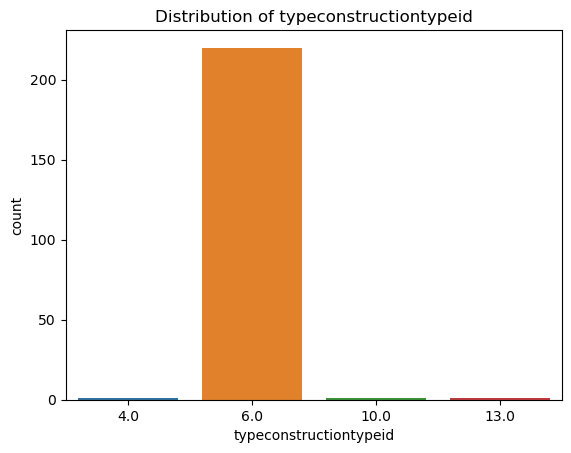

~~~~~~~~~~~~


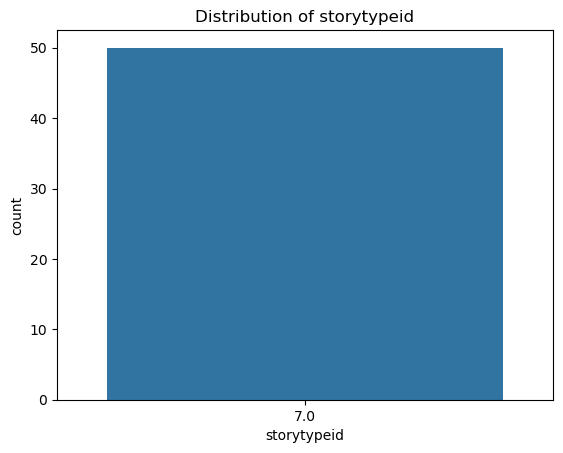

~~~~~~~~~~~~


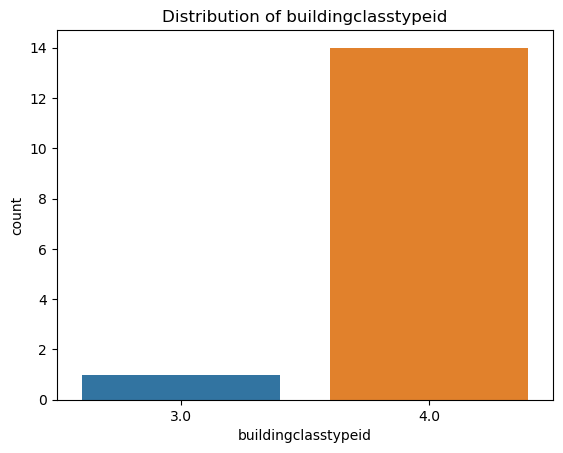

~~~~~~~~~~~~


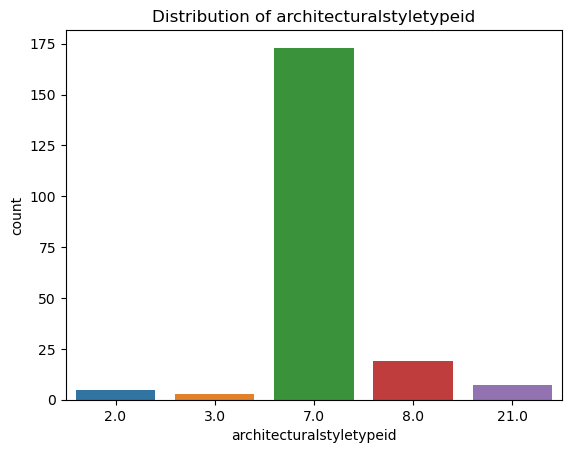

~~~~~~~~~~~~


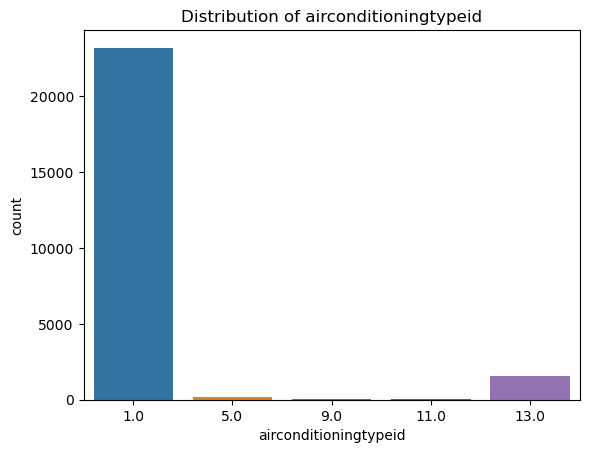

~~~~~~~~~~~~


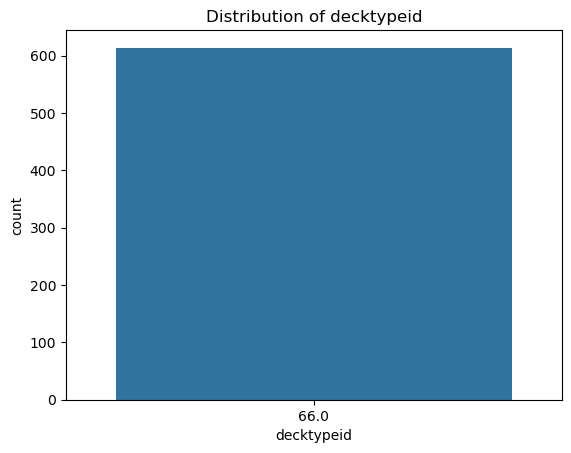

~~~~~~~~~~~~


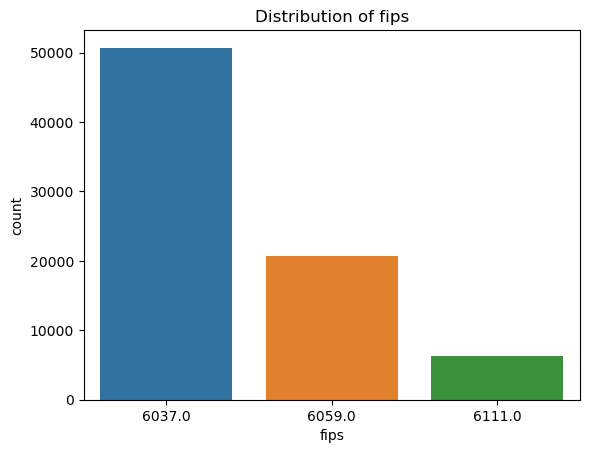

~~~~~~~~~~~~


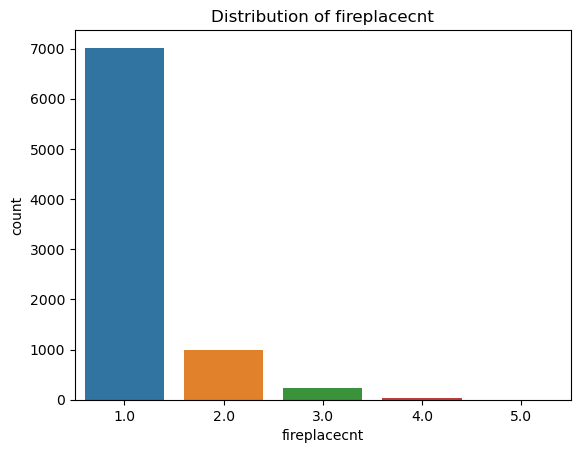

~~~~~~~~~~~~


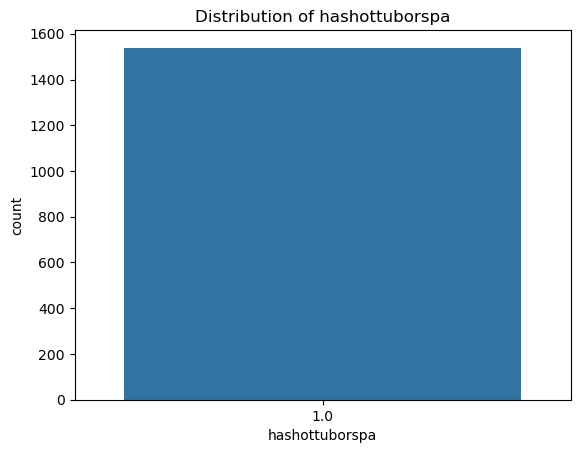

~~~~~~~~~~~~


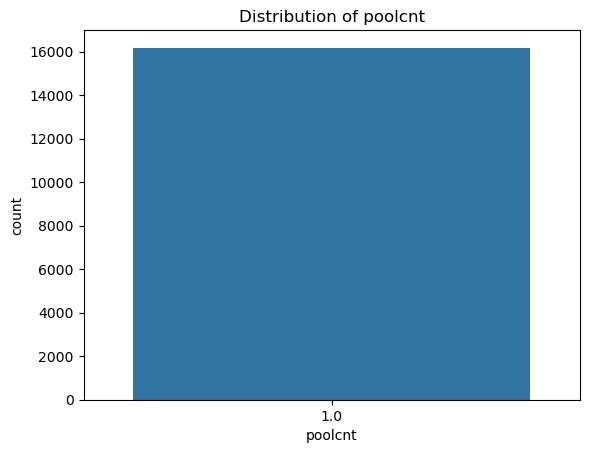

~~~~~~~~~~~~


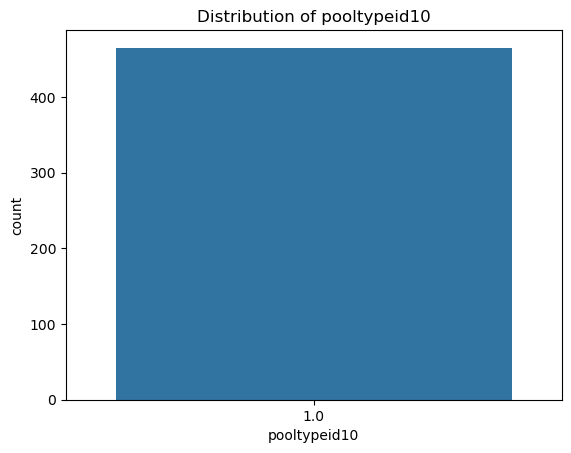

~~~~~~~~~~~~


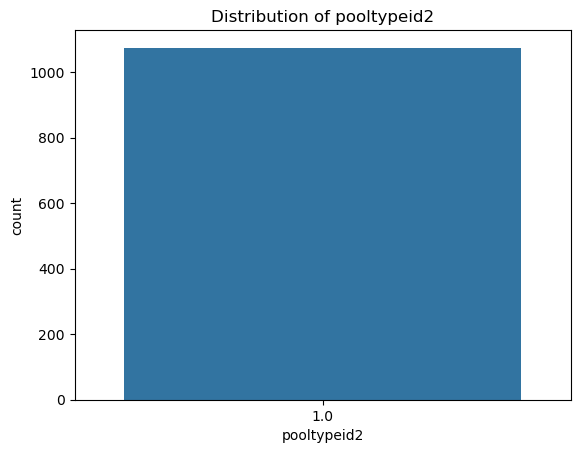

~~~~~~~~~~~~


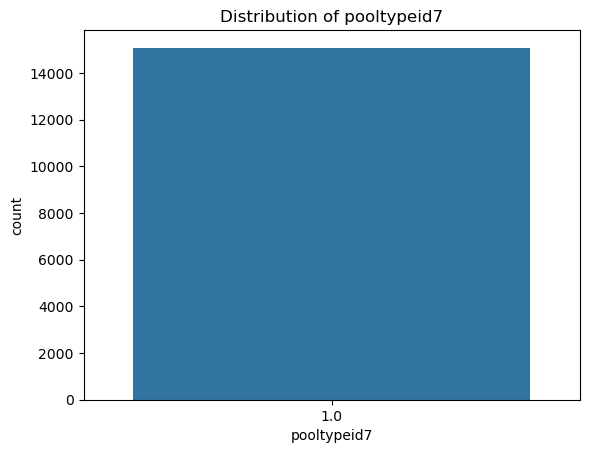

~~~~~~~~~~~~


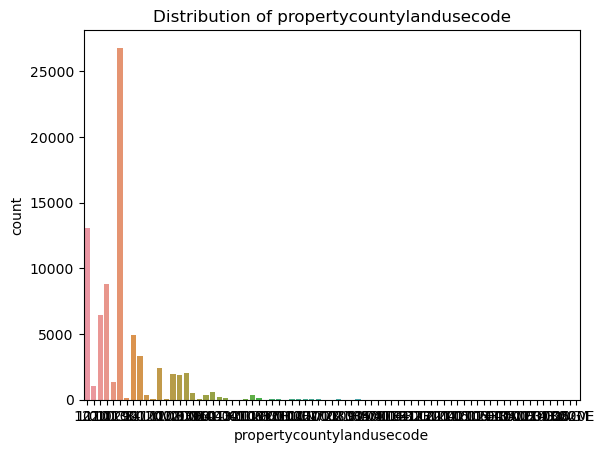

~~~~~~~~~~~~


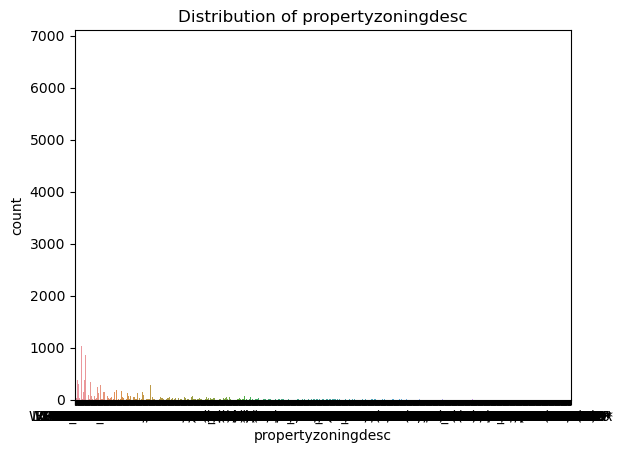

~~~~~~~~~~~~


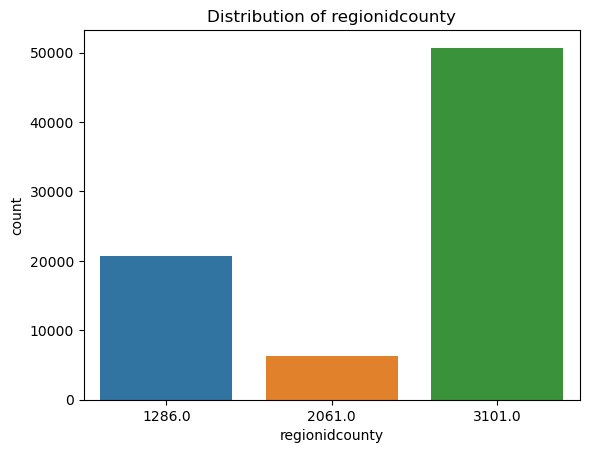

~~~~~~~~~~~~


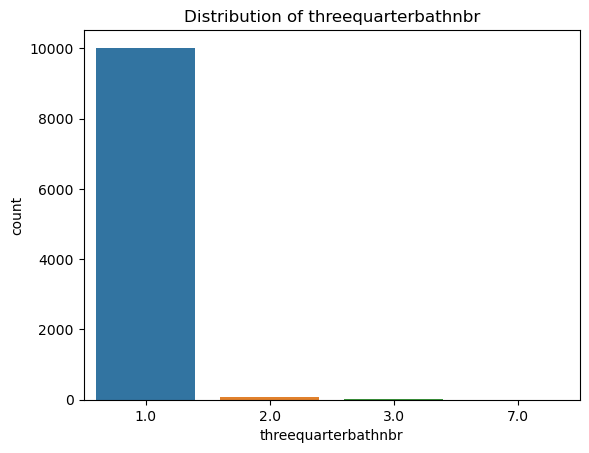

~~~~~~~~~~~~


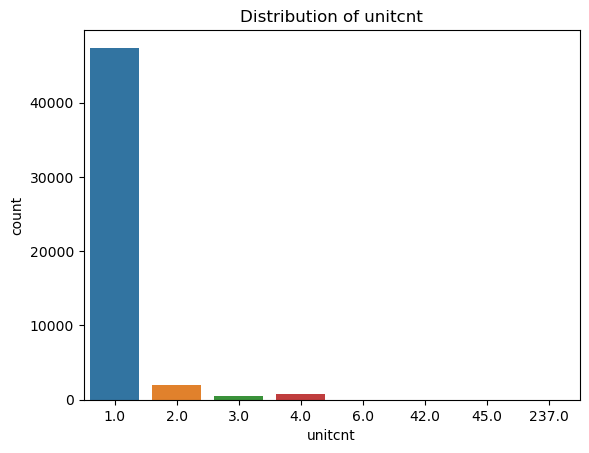

~~~~~~~~~~~~


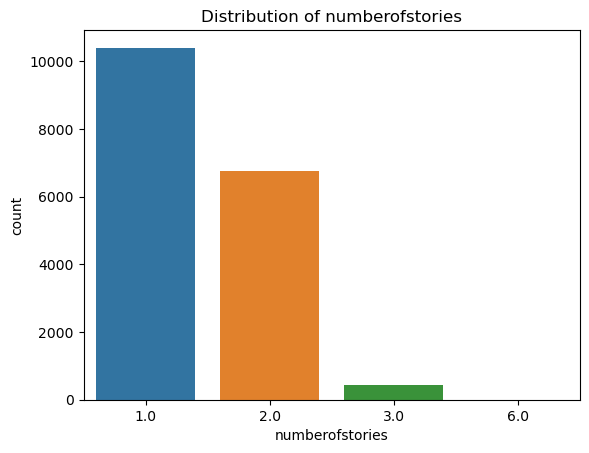

~~~~~~~~~~~~


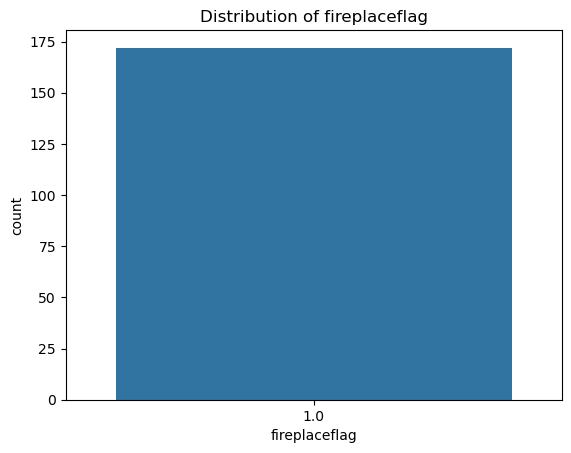

~~~~~~~~~~~~


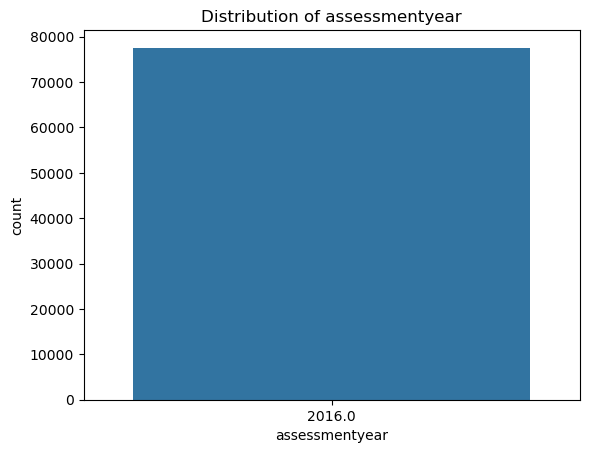

~~~~~~~~~~~~


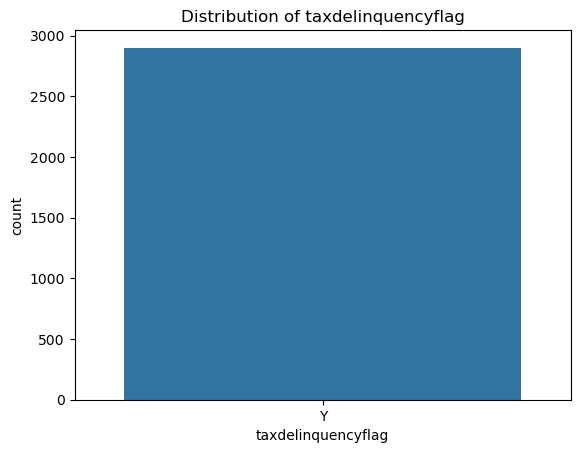

~~~~~~~~~~~~


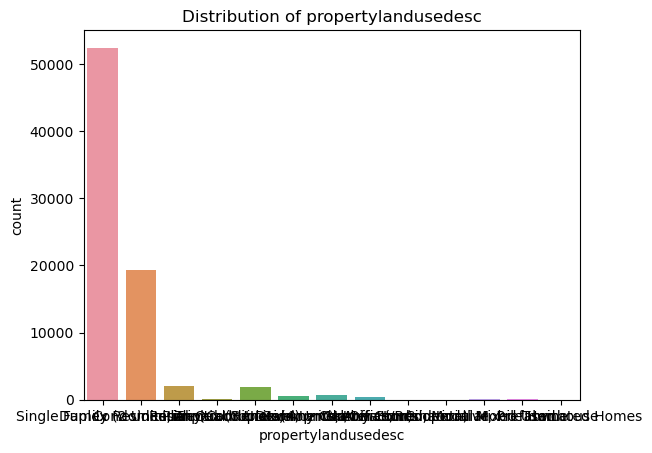

~~~~~~~~~~~~


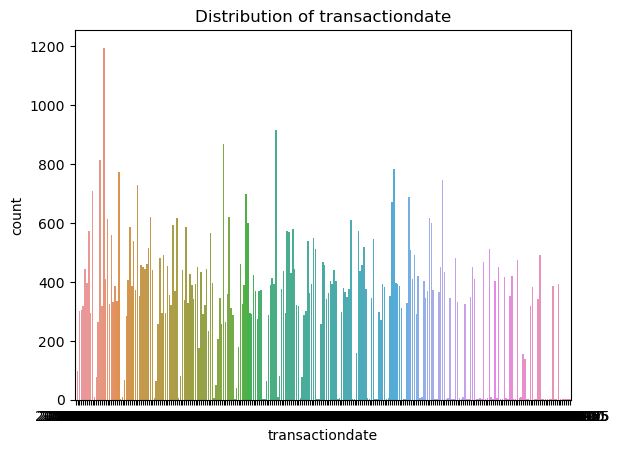

~~~~~~~~~~~~


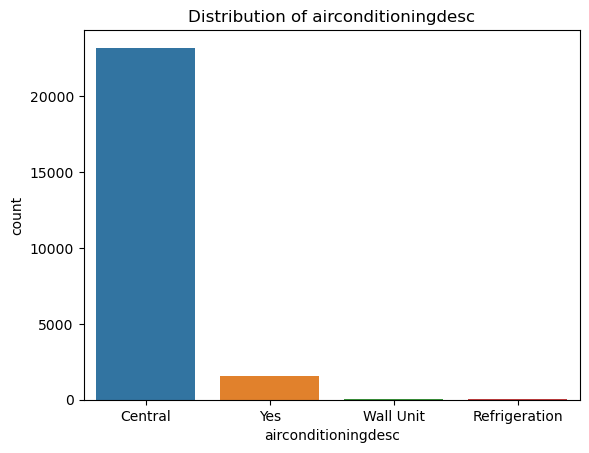

~~~~~~~~~~~~


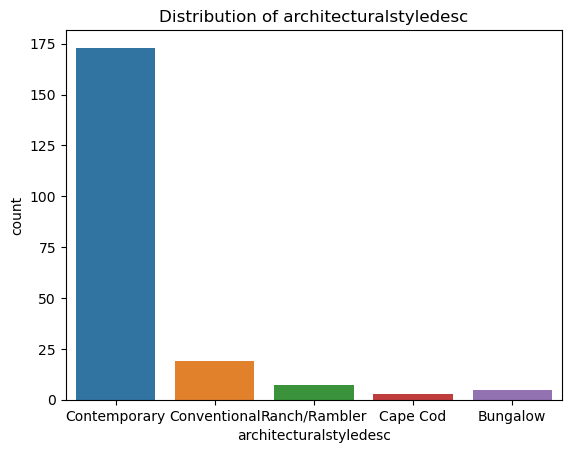

~~~~~~~~~~~~


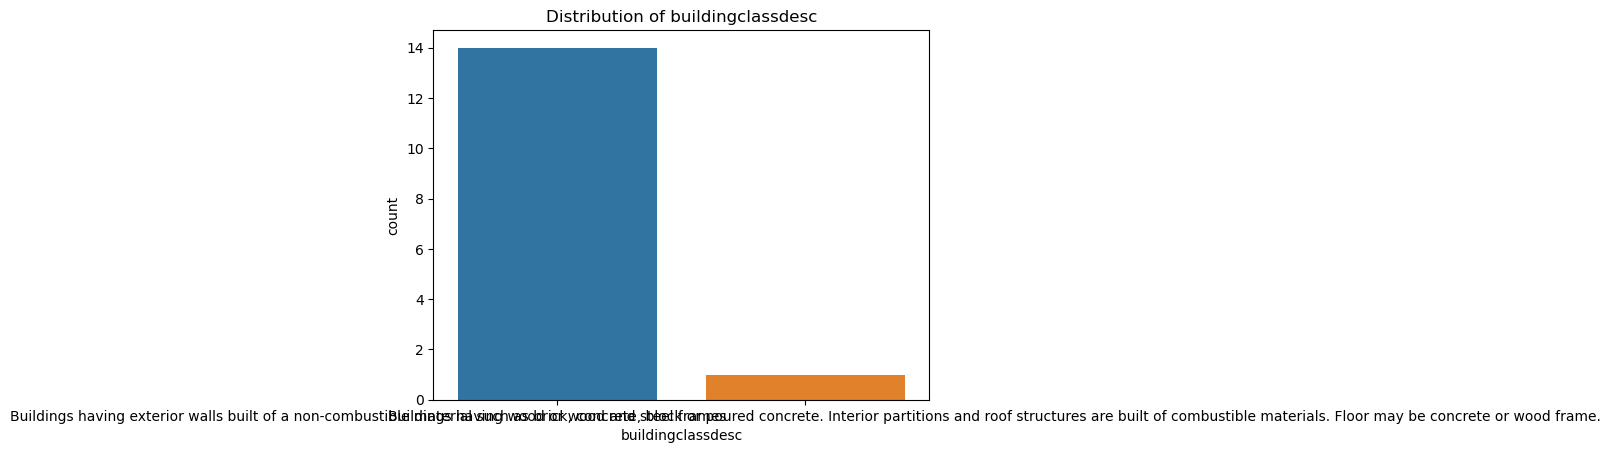

~~~~~~~~~~~~


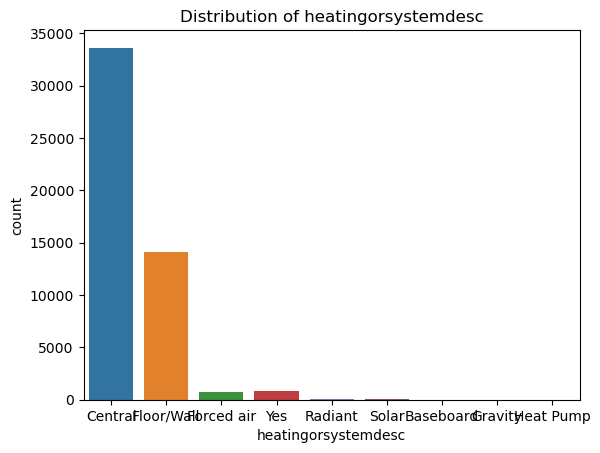

~~~~~~~~~~~~


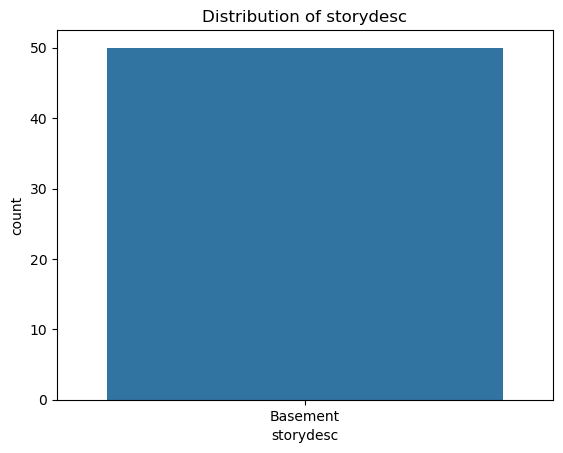

~~~~~~~~~~~~


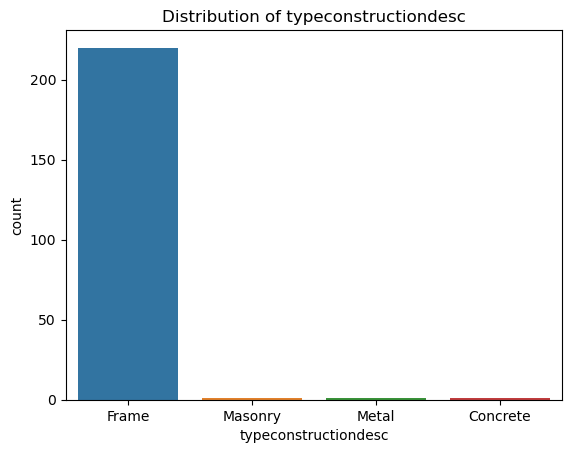

~~~~~~~~~~~~


In [8]:
for col in cat_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()
    print('~~~~~~~~~~~~')

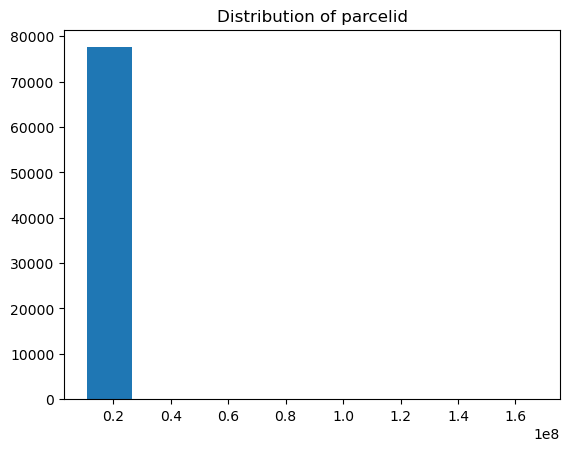

~~~~~~~~~~~~


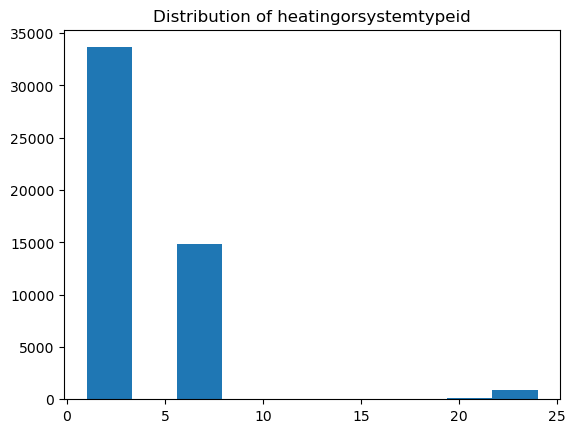

~~~~~~~~~~~~


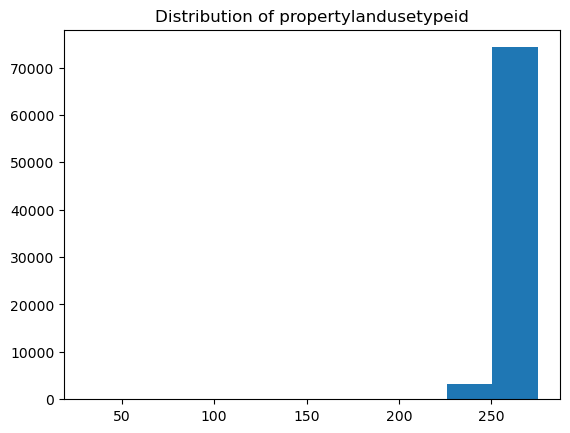

~~~~~~~~~~~~


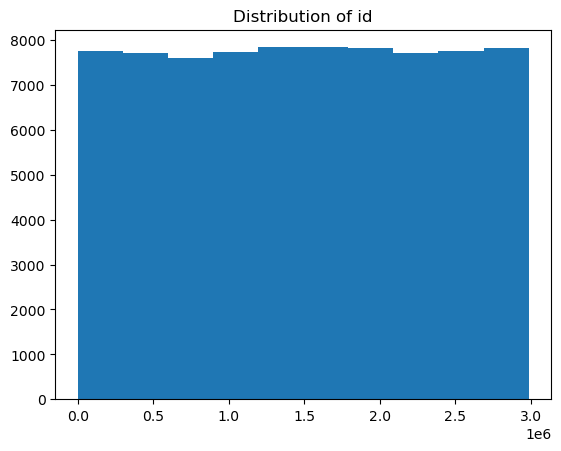

~~~~~~~~~~~~


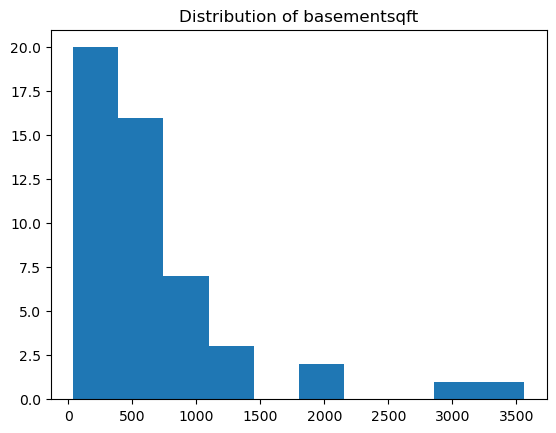

~~~~~~~~~~~~


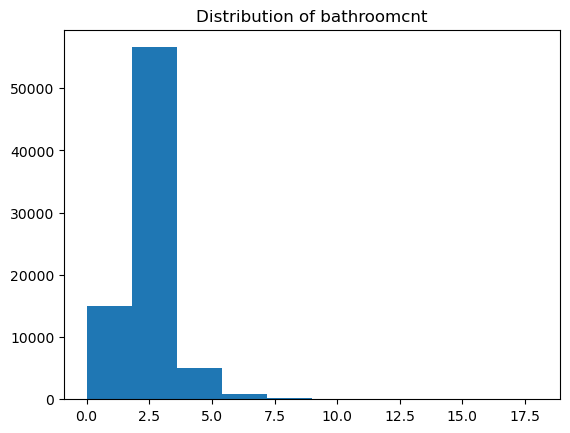

~~~~~~~~~~~~


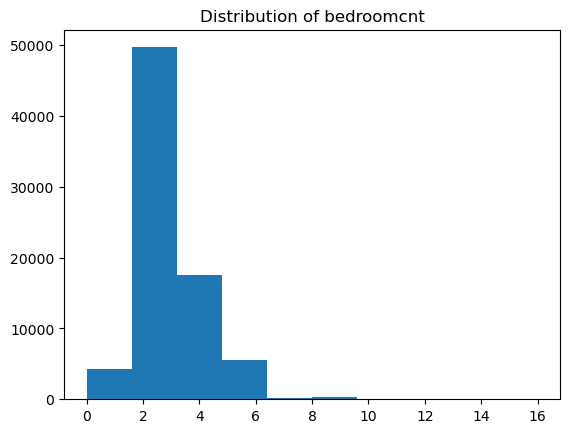

~~~~~~~~~~~~


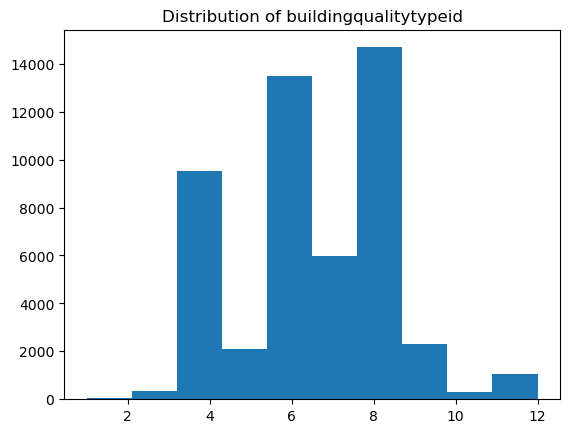

~~~~~~~~~~~~


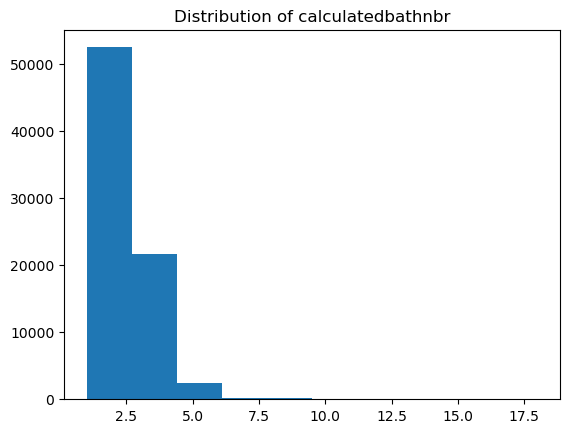

~~~~~~~~~~~~


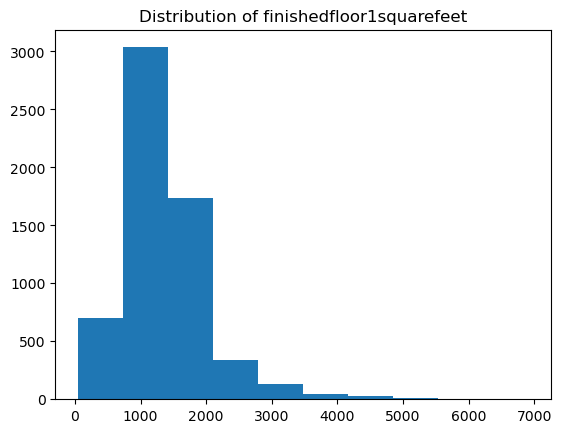

~~~~~~~~~~~~


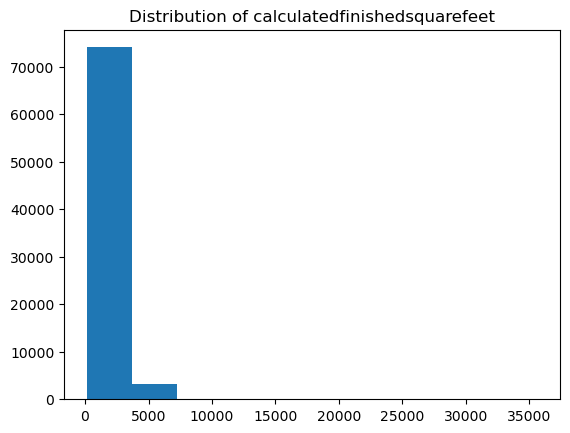

~~~~~~~~~~~~


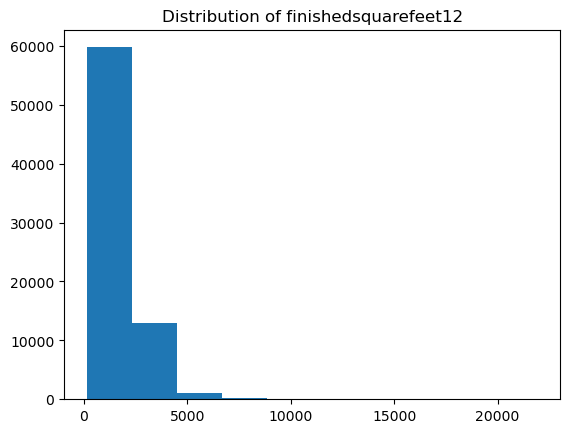

~~~~~~~~~~~~


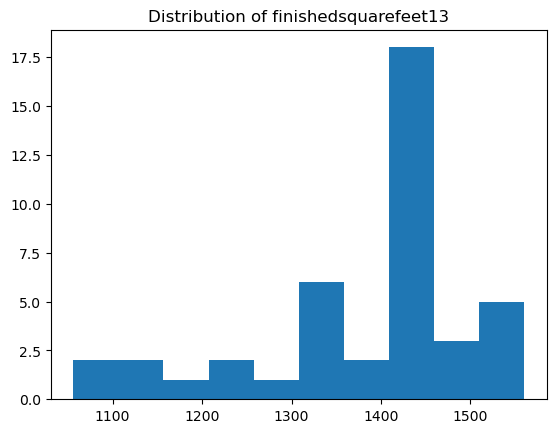

~~~~~~~~~~~~


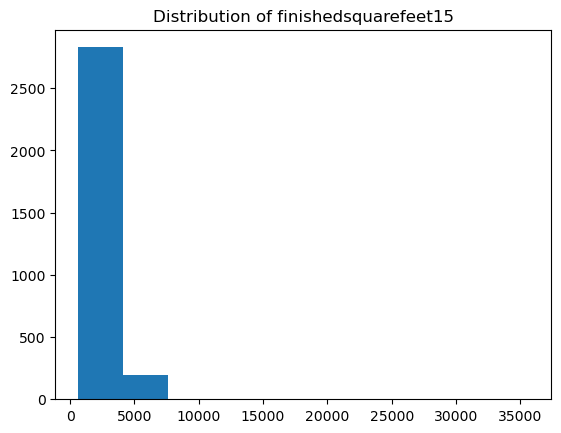

~~~~~~~~~~~~


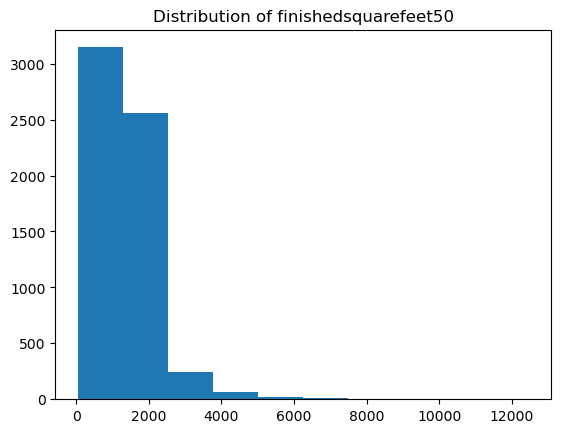

~~~~~~~~~~~~


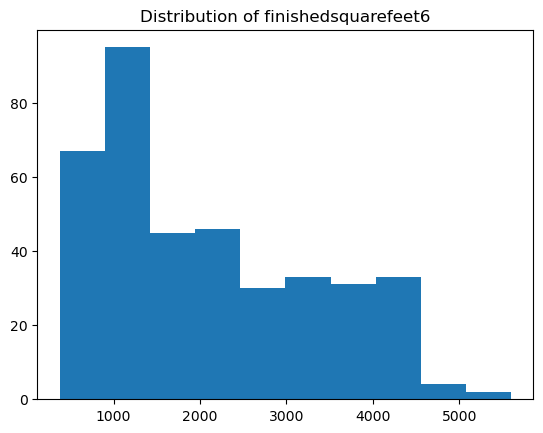

~~~~~~~~~~~~


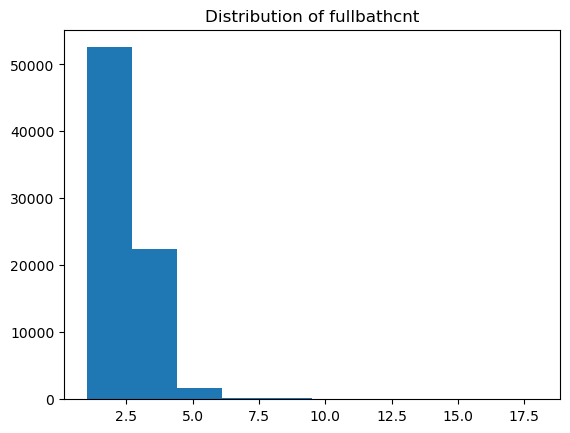

~~~~~~~~~~~~


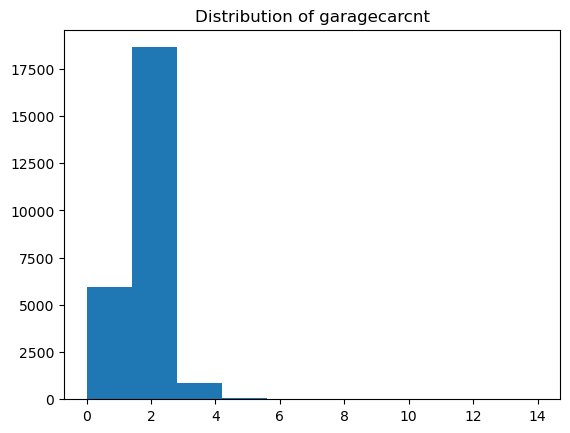

~~~~~~~~~~~~


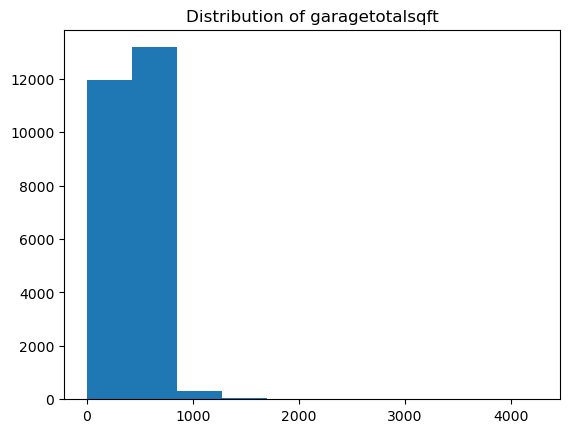

~~~~~~~~~~~~


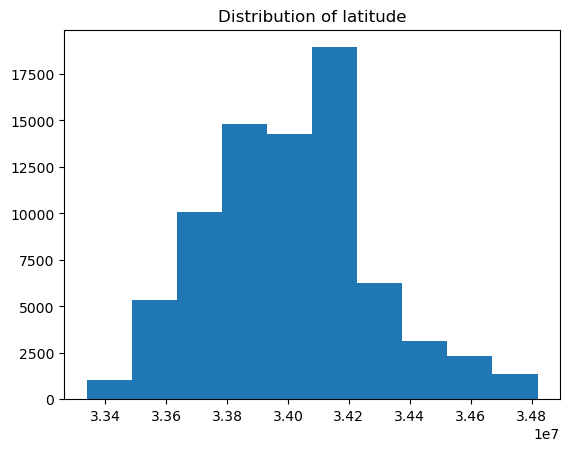

~~~~~~~~~~~~


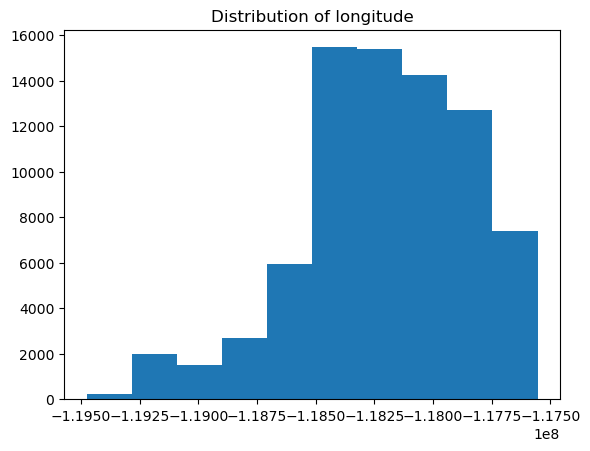

~~~~~~~~~~~~


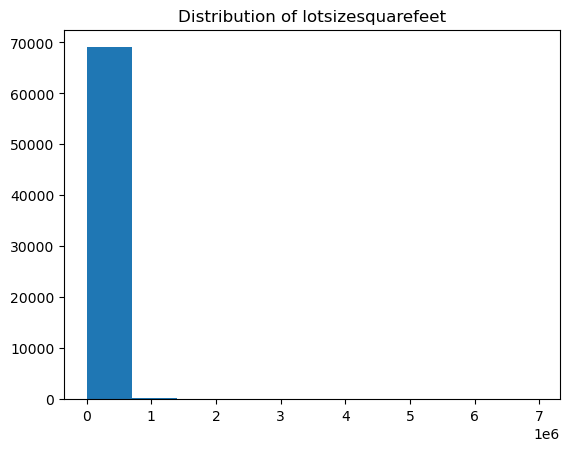

~~~~~~~~~~~~


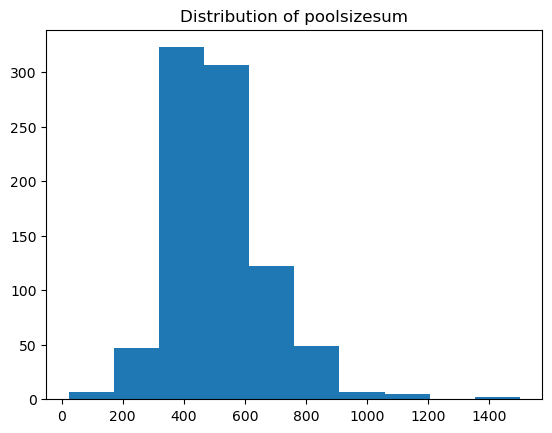

~~~~~~~~~~~~


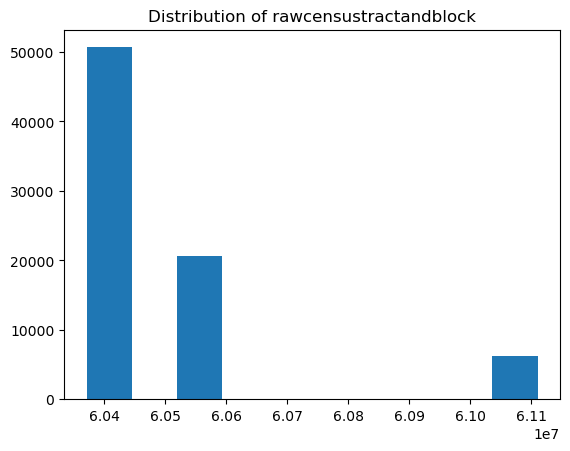

~~~~~~~~~~~~


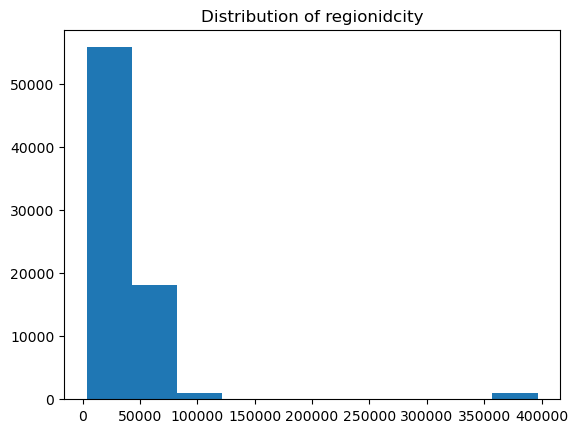

~~~~~~~~~~~~


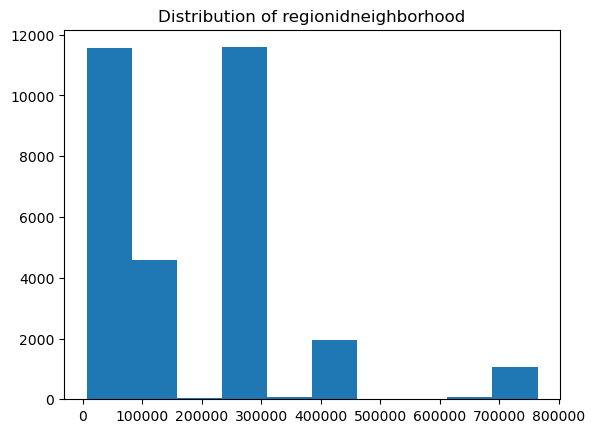

~~~~~~~~~~~~


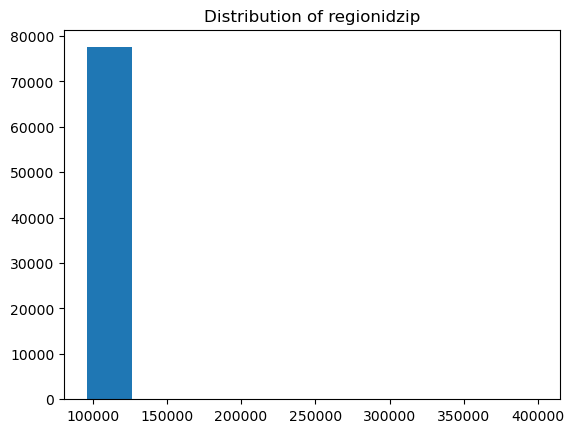

~~~~~~~~~~~~


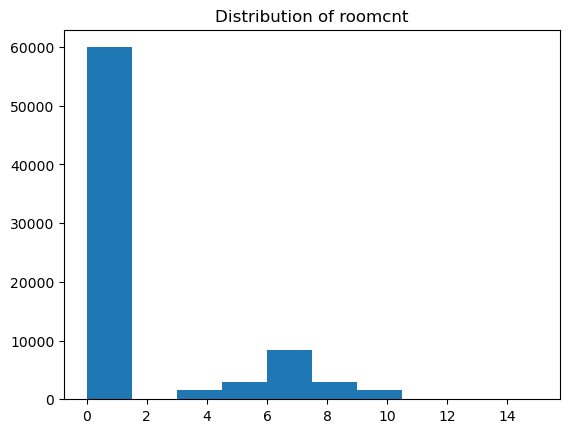

~~~~~~~~~~~~


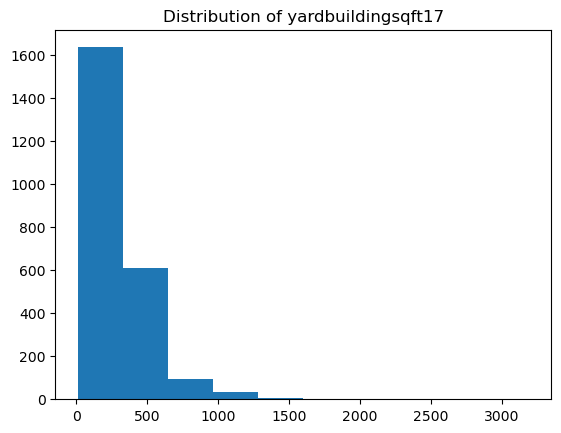

~~~~~~~~~~~~


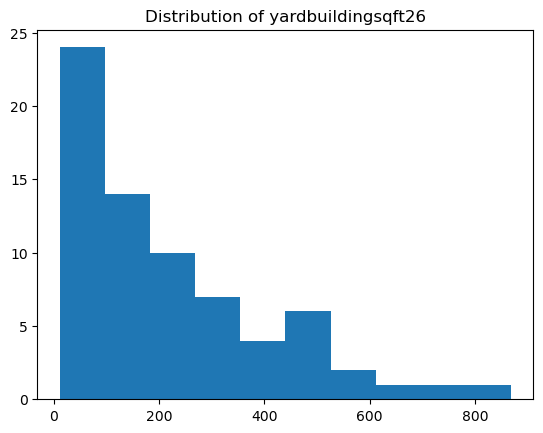

~~~~~~~~~~~~


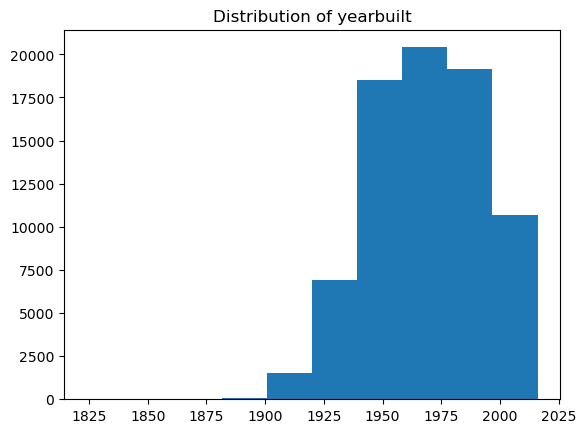

~~~~~~~~~~~~


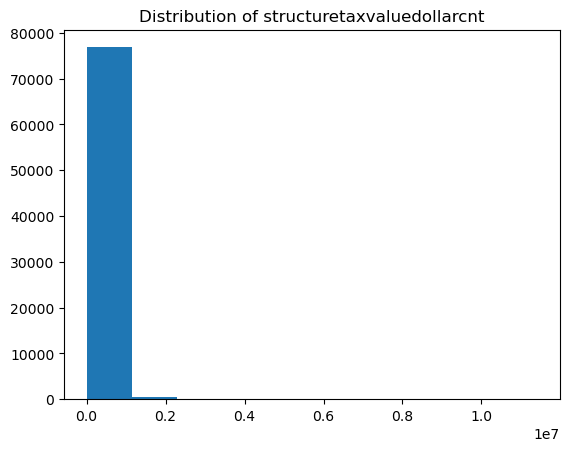

~~~~~~~~~~~~


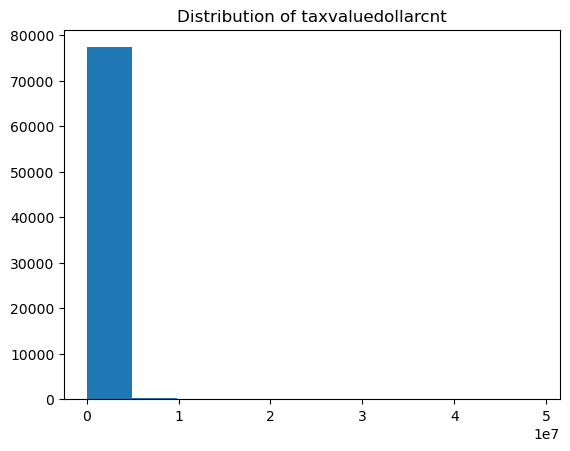

~~~~~~~~~~~~


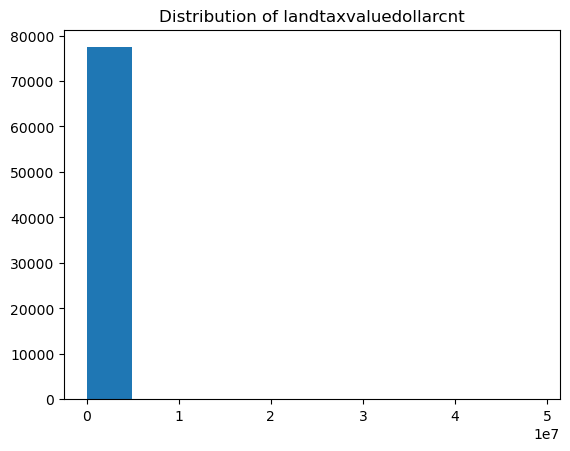

~~~~~~~~~~~~


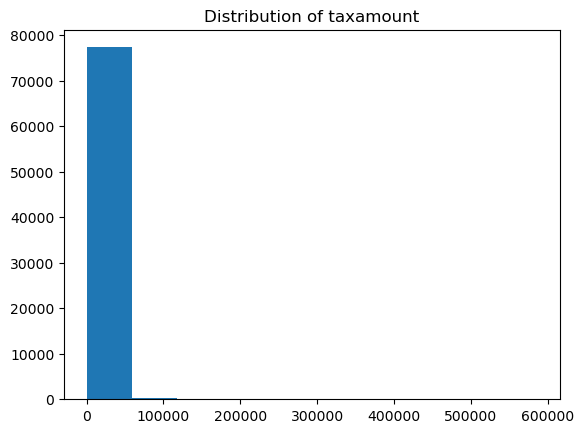

~~~~~~~~~~~~


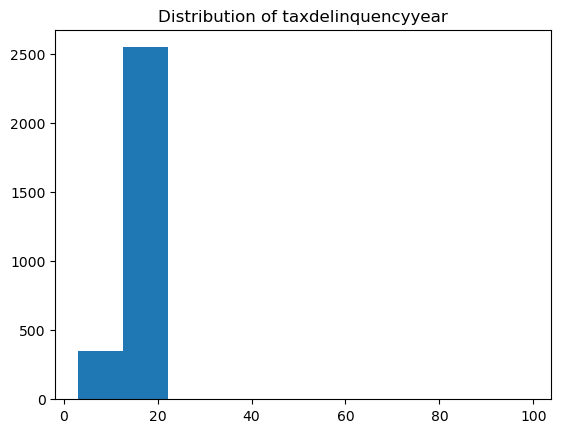

~~~~~~~~~~~~


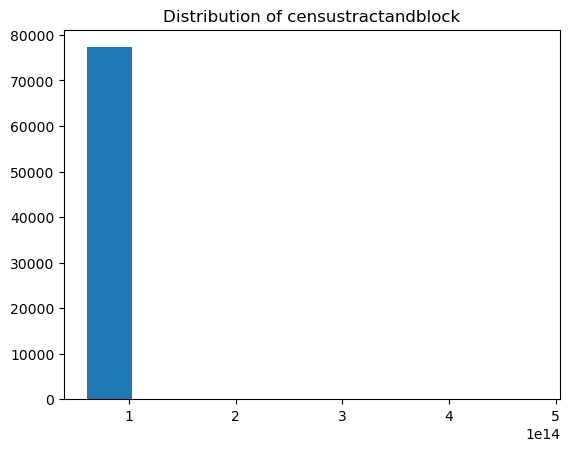

~~~~~~~~~~~~


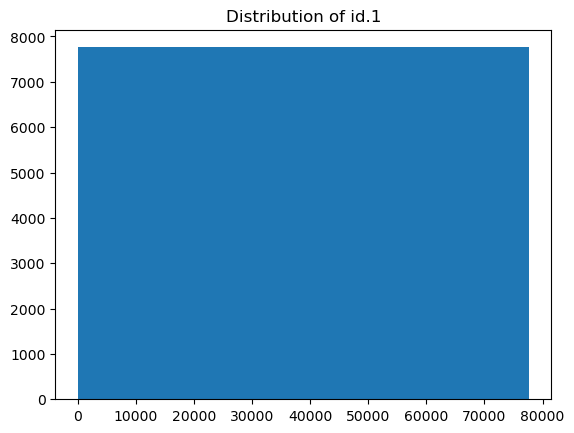

~~~~~~~~~~~~


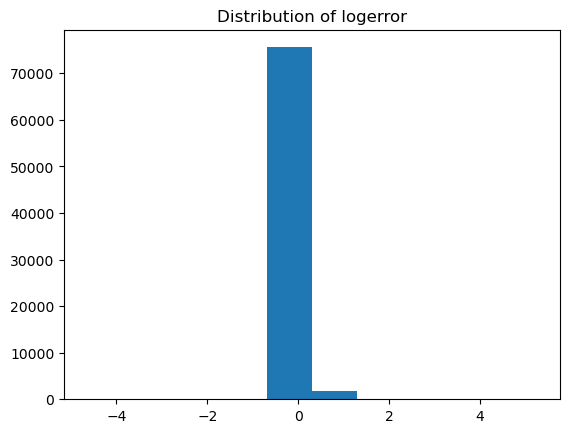

~~~~~~~~~~~~


In [9]:
for col in num_cols:
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()
    print('~~~~~~~~~~~~')

In [10]:
pd.set_option('display.max_row', None)

In [11]:
a.check_columns(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
34,pooltypeid2,1,"[nan, 1.0]",76540,0.986162,float64
2,storytypeid,1,"[nan, 7.0]",77564,0.999356,float64
31,poolcnt,1,"[nan, 1.0]",61440,0.791610,float64
56,taxdelinquencyflag,1,"[nan, Y]",74714,0.962636,object
53,assessmentyear,1,"[2016.0, nan]",34,0.000438,float64
50,fireplaceflag,1,"[nan, 1.0]",77442,0.997784,float64
27,hashottuborspa,1,"[nan, 1.0]",76075,0.980171,float64
14,decktypeid,1,"[nan, 66.0]",77000,0.992089,float64
33,pooltypeid10,1,"[nan, 1.0]",77149,0.994009,float64
35,pooltypeid7,1,"[nan, 1.0]",62535,0.805718,float64


### 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.




In [12]:
def missing_by_row(df):
    '''
    prints out a report of how many columns have a certain
    number of columns/fields missing both by count and proportion
    
    '''
    data = []
    # Loop through each column in the dataframe
    for column in df.columns:
        # Append the column name, number of null values, and proportion of null values
        data.append(
            [
                column,
                df[column].isna().sum(),
                df[column].isna().mean() 
            ]
        )
    # Create a pandas dataframe from the data list, with column names 'Column Name', 'Number of Null Values', and 'Proportion of Null Values'
    # Sort the resulting dataframe by the 'Proportion of Null Values' column in ascending order
    return pd.DataFrame(
        data,
        columns=[
            "Column Name",
            "Number of Null Values",
            "Proportion of Null Values" 
        ],
    ).sort_values(by='Proportion of Null Values')

In [13]:
missing_by_row(df)

,Column Name,Number of Null Values,Proportion of Null Values
0,parcelid,0,0.000000
62,transactiondate,0,0.000000
61,logerror,0,0.000000
8,id,0,0.000000
60,id.1,0,0.000000
28,latitude,34,0.000438
29,longitude,34,0.000438
59,propertylandusedesc,34,0.000438
36,propertycountylandusecode,34,0.000438
38,rawcensustractandblock,34,0.000438


## Prepare



### 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.


In [14]:
df.columns

Index(['parcelid', 'typeconstructiontypeid', 'storytypeid',
       'heatingorsystemtypeid', 'buildingclasstypeid',
       'architecturalstyletypeid', 'airconditioningtypeid',
       'propertylandusetypeid', 'id', 'basementsqft', 'bathroomcnt',
       'bedroomcnt', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yardbuildings

In [15]:
# want to drop all properties that are NOT single units (single family homes)
# lets see what our choices are from the propertylandusedesc	
df[['propertylandusedesc', 'propertylandusetypeid']].value_counts()

propertylandusedesc                         propertylandusetypeid
Single Family Residential                   261.0                    52442
Condominium                                 266.0                    19342
Duplex (2 Units, Any Combination)           246.0                     2021
Planned Unit Development                    269.0                     1947
Quadruplex (4 Units, Any Combination)       248.0                      729
Triplex (3 Units, Any Combination)          247.0                      539
Cluster Home                                265.0                      335
Mobile Home                                 263.0                       74
Manufactured, Modular, Prefabricated Homes  275.0                       59
Residential General                         260.0                       42
Cooperative                                 267.0                       29
Commercial/Office/Residential Mixed Used    31.0                        15
Townhouse                         

In [16]:
df = df[(df['propertylandusetypeid'] == 261)]

In [17]:
df.shape

(52442, 69)

In [18]:
df.propertylandusedesc.value_counts()

propertylandusedesc
Single Family Residential    52442
Name: count, dtype: int64

### 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).


* The input:
    * A dataframe
    * A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    * A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).


* The output:
    * The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.


* hint:
    * Look up the dropna documentation.
    * You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.


In [19]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    """
    Drop rows or columns based on the percent of values that are missing.

    Parameters:
    df (pandas.DataFrame): The input dataframe.
    prop_required_column (float): The proportion of non-missing values required to keep a column.
    prop_required_row (float): The proportion of non-missing values required to keep a row.

    Returns:
    pandas.DataFrame: The dataframe with missing values handled.
    """
    temp_df = df
    # Drop columns with too many missing values
    threshold = int(round(prop_required_column * len(df.index), 0))
    temp_df.dropna(axis=1, thresh=threshold, inplace=True)

    # Drop rows with too many missing values
    threshold = int(round(prop_required_row * len(df.columns), 0))
    temp_df.dropna(axis=0, thresh=threshold, inplace=True)

    return temp_df


In [20]:
temp_df = handle_missing_values(df, prop_required_column=.6, prop_required_row=.75)

In [21]:
temp_df.head()

,parcelid,heatingorsystemtypeid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,id.1,logerror,transactiondate,heatingorsystemdesc
0,14297519,NaN,261.0,1727539,3.5,4.0,NaN,3.5,3100.0,3100.0,...,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,Single Family Residential,0,0.025595,2017-01-01,NaN
1,17052889,NaN,261.0,1387261,1.0,2.0,NaN,1.0,1465.0,1465.0,...,464000.0,2016.0,376000.0,5672.48,6.111001e+13,Single Family Residential,1,0.055619,2017-01-01,NaN
2,14186244,NaN,261.0,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,Single Family Residential,2,0.005383,2017-01-01,NaN
3,12177905,2.0,261.0,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,Single Family Residential,3,-0.103410,2017-01-01,Central
6,12095076,2.0,261.0,781532,3.0,4.0,9.0,3.0,2962.0,2962.0,...,773303.0,2016.0,496619.0,9516.26,6.037461e+13,Single Family Residential,6,-0.001011,2017-01-01,Central


In [22]:
temp_df.shape

(52377, 35)

In [23]:
a.check_columns(temp_df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
2,propertylandusetypeid,1,[261.0],0,0.000000,float64
30,propertylandusedesc,1,[Single Family Residential],0,0.000000,object
26,assessmentyear,1,[2016.0],0,0.000000,float64
19,regionidcounty,3,"[1286.0, 2061.0, 3101.0]",0,0.000000,float64
22,unitcnt,3,"[nan, 1.0, 2.0, 3.0]",18529,0.353762,float64
10,fips,3,"[6059.0, 6111.0, 6037.0]",0,0.000000,float64
34,heatingorsystemdesc,8,"[nan, Central, Floor/Wall, Forced air, Radiant...",18457,0.352387,object
1,heatingorsystemtypeid,9,"[nan, 2.0, 7.0, 6.0, 18.0, 20.0, 13.0, 24.0, 1...",18441,0.352082,float64
6,buildingqualitytypeid,12,"[nan, 8.0, 9.0, 5.0, 4.0, 6.0, 7.0, 10.0, 11.0...",18636,0.355805,float64
11,fullbathcnt,13,"[3.0, 1.0, 2.0, 4.0, 5.0, 6.0, 9.0, 8.0, 7.0, ...",72,0.001375,float64


### 3. Encapsulate your work inside of functions in a wrangle_zillow.py module.

Saved to wrangle_zillow.py

# Mall Customers



## Notebook



### 1. Acquire data from the customers table in the mall_customers database.


In [24]:
def acquire_mall():
    '''
    acquire_mall will use a local env.py
    using pre-set credentials called user, password, and host
    please make sure you have a properly formatted env.py
    file in the same directory as this module
    and that you have the access rights to mall_customers schema
    
    return: a single pandas dataframe
    '''
    
    filename = "mall_data.csv"
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
    else:
        query = """
        SELECT * FROM customers;
        """
        connection = get_db_url("mall_customers")
        df = pd.read_sql(query, connection)
        df.to_csv(filename, index=False)
    return df

In [25]:
df = acquire_mall()

### 2. Summarize the data (include distributions and descriptive statistics).


In [26]:
a.check_columns(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
1,gender,2,"[Male, Female]",0,0.0,object
2,age,51,"[19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 2...",0,0.0,int64
3,annual_income,64,"[15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 2...",0,0.0,int64
4,spending_score,84,"[39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15,...",0,0.0,int64
0,customer_id,200,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0,0.0,int64


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [28]:
def dist_columns(df):
    for col in df:
        plt.hist(df[col])
        plt.title(f'Distribution of {col}')
        plt.show()

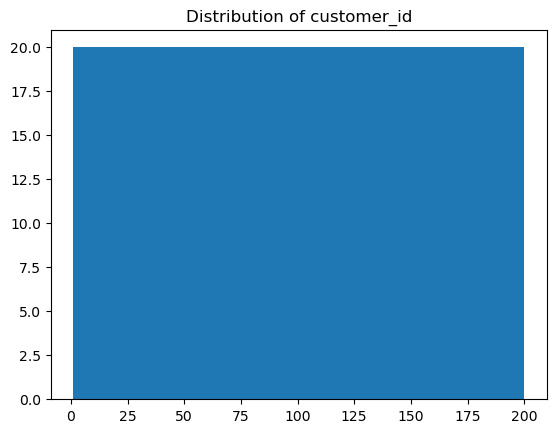

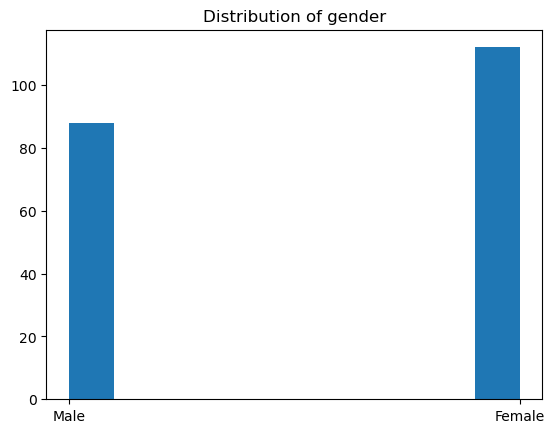

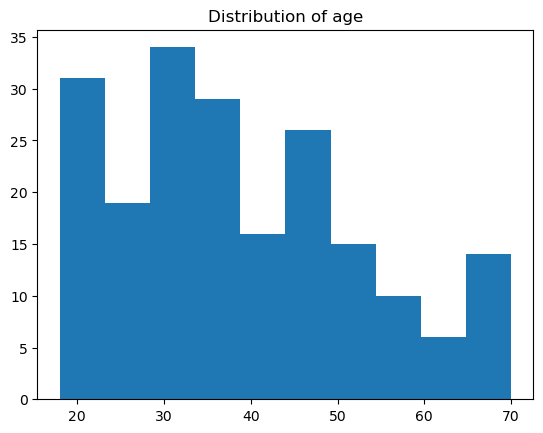

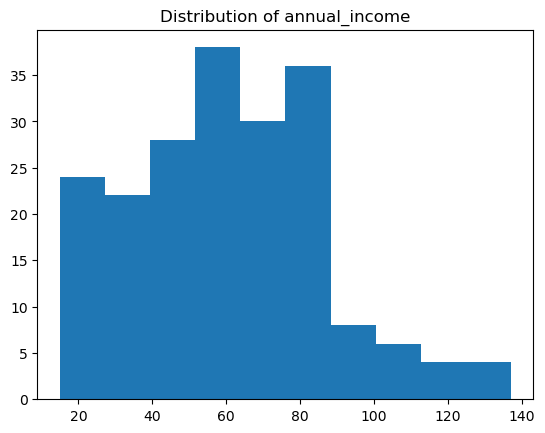

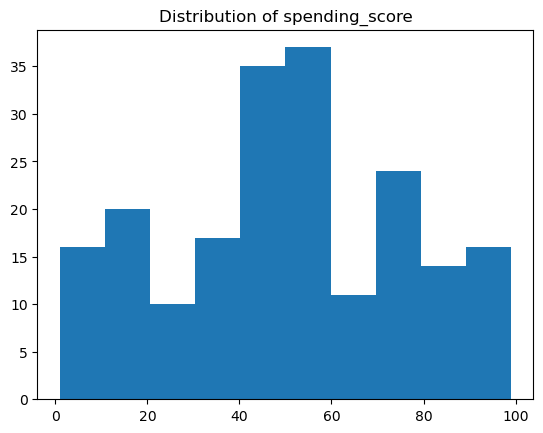

In [29]:
dist_columns(df)

### 3. Detect outliers using IQR.


In [30]:
import wrangle_mall as wm

In [31]:
wm.report_outliers(df)

Outliers for Col customer_id:
lower:  -98.5 upper:  299.5
Series([], Name: customer_id, dtype: int64)
----------
Outliers for Col age:
lower:  -1.625 upper:  79.375
Series([], Name: age, dtype: int64)
----------
Outliers for Col annual_income:
lower:  -13.25 upper:  132.75
198    137
199    137
Name: annual_income, dtype: int64
----------
Outliers for Col spending_score:
lower:  -22.625 upper:  130.375
Series([], Name: spending_score, dtype: int64)
----------


In [32]:
wm.summarize(df)

Shape of Data: 
(200, 5)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
Descriptions:
|                |   count |   mean |     std |   min |   25% |   50% |    75% |   max |
|:---------------|--------:|-------:|--------:|------:|------:|------:|-------:|------:|
| customer_id    |     200 | 100.5  | 57.8792 |     1 | 50.75 | 100.5 | 150.25 |   200 |
| age            |     200 |  38.85 | 13.969  |    18 | 28.75 |  36   |  49    |    70 |
| annual_income  |     200 |  60.56 | 26.2647 |    15 | 41.5  |  61.5 |  78    |   137 |
| spending_score |     200 |  50.2  | 25.8

### 4. Split data into train, validate, and test.


### 5. Encode categorical columns using a one hot encoder (pd.get_dummies).


### 6. Handles missing values.


### 7. Scaling


Encapsulate your work in a wrangle_mall.py python module.